<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/Sample_Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [2]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

In [12]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

In the original research, there are seven different types of date fruits, 898 preprocessed samples, and a total of 34 morphological, shape, and colour features. The date fruits data set used in this report are a subset and consist of three types of date with the most samples which are Sukkary, Ruthana and Safawi from Saudi Arabia Riyadh and Medina region, totally 226. Fig.\ref{fig_date_fruits} provides the general images of three date fruits. The seven morphological features employed are perimeter, main axis, minor axis, eccentricity, eqdiasq, solidity, and convex area. The majority of characteristics can be understood in a literal sense except eqdiasq which is an abbreviation meaning equivalent diameter. The equivalent diameter is computed by $d = 2 \sqrt{\text{Area}/\pi}$ as the diameter of a circle with an equal aggregate sectional area. This is a traditional aggregate classification method that may be found in many digital image processing programmes.
The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of date fruits were measured:

1. PERIMETER
2. MAJOR_AXIS
3. MINOR_AXIS
4. ECCENTRICITY
5. EQDIASQ
6. SOLIDITY
7. CONVEX_AREA

All of these parameters were real-valued continuous.

https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets

In [15]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/jiaxunguo/INSE6220project/main/fruits.csv')
df.head(25)

PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0   1427.5811    515.6693    354.6234        0.7260  427.2253    0.9865   
1   1671.4170    615.8516    403.3667        0.7557  497.3849    0.9870   
2   1503.5980    546.4366    361.8018        0.7494  443.1601    0.9883   
3   1463.5551    544.9724    361.5594        0.7482  443.4745    0.9944   
4   1403.3560    542.0650    326.1642        0.7987  419.5720    0.9935   
5   1467.7220    573.7374    333.2054        0.8141  436.7935    0.9918   
6   1569.0680    587.9650    367.5672        0.7805  464.0740    0.9923   
7   1530.7870    564.7152    362.0923        0.7674  451.0723    0.9920   
8   1487.1000    534.5702    393.8198        0.6762  457.7480    0.9923   
9   1426.8580    535.9053    345.1051        0.7651  429.6369    0.9922   
10  1249.1790    455.7418    321.8139        0.7081  382.6304    0.9915   
11  1365.8560    519.2155    318.9104        0.7891  406.6645    0.9908   
12  1447.6470    546.0123    343.9355        0.7767  432.9272    0.9930   
13  1681.7620    665.5488    372.4787        0.8287  495.6565    0.9926   
14  1749.9590    686.3148    390.2822        0.8226  516.7471    0.9928   
15  1317.3640    484.1170    329.4612        0.7327  399.0715    0.9909   
16  1420.2120    530.3442    350.9143        0.7498  431.1782    0.9947   
17  1435.4399    526.9439    362.1404        0.7264  436.7367    0.9940   
18  1397.4399    533.3875    330.7272        0.7846  419.2669    0.9927   
19  1454.7970    541.0281    357.0083        0.7514  439.2773    0.9941   
20  1172.3190    418.8293    306.6660        0.6811  357.7994    0.9895   
21  1496.6240    567.7551    349.5084        0.7881  444.9879    0.9870   
22  1410.5270    536.2725    323.7206        0.7972  416.4117    0.9909   
23  1435.1960    546.4086    335.3802        0.7895  427.3653    0.9896   
24  1662.2170    625.8346    390.4694        0.7815  492.6690    0.9884   

    CONVEX_AREA  Class  
0        145320      0  
1        196863      0  
2        156070      0  
3        155339      0  
4        139162      0  
5        151080      0  
6        170461      0  
7        161095      0  
8        165851      0  
9        146121      0  
10       115968      0  
11       131098      0  
12       148249      0  
13       194383      0  
14       211245      0  
15       126226      0  
16       146796      0  
17       150711      0  
18       139081      0  
19       152457      0  
20       101619      0  
21       157562      0  
22       137436      0  
23       144948      0  
24       192862      0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PERIMETER     226 non-null    float64
 1   MAJOR_AXIS    226 non-null    float64
 2   MINOR_AXIS    226 non-null    float64
 3   ECCENTRICITY  226 non-null    float64
 4   EQDIASQ       226 non-null    float64
 5   SOLIDITY      226 non-null    float64
 6   CONVEX_AREA   226 non-null    int64  
 7   Class         226 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 14.2 KB


In [17]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [18]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

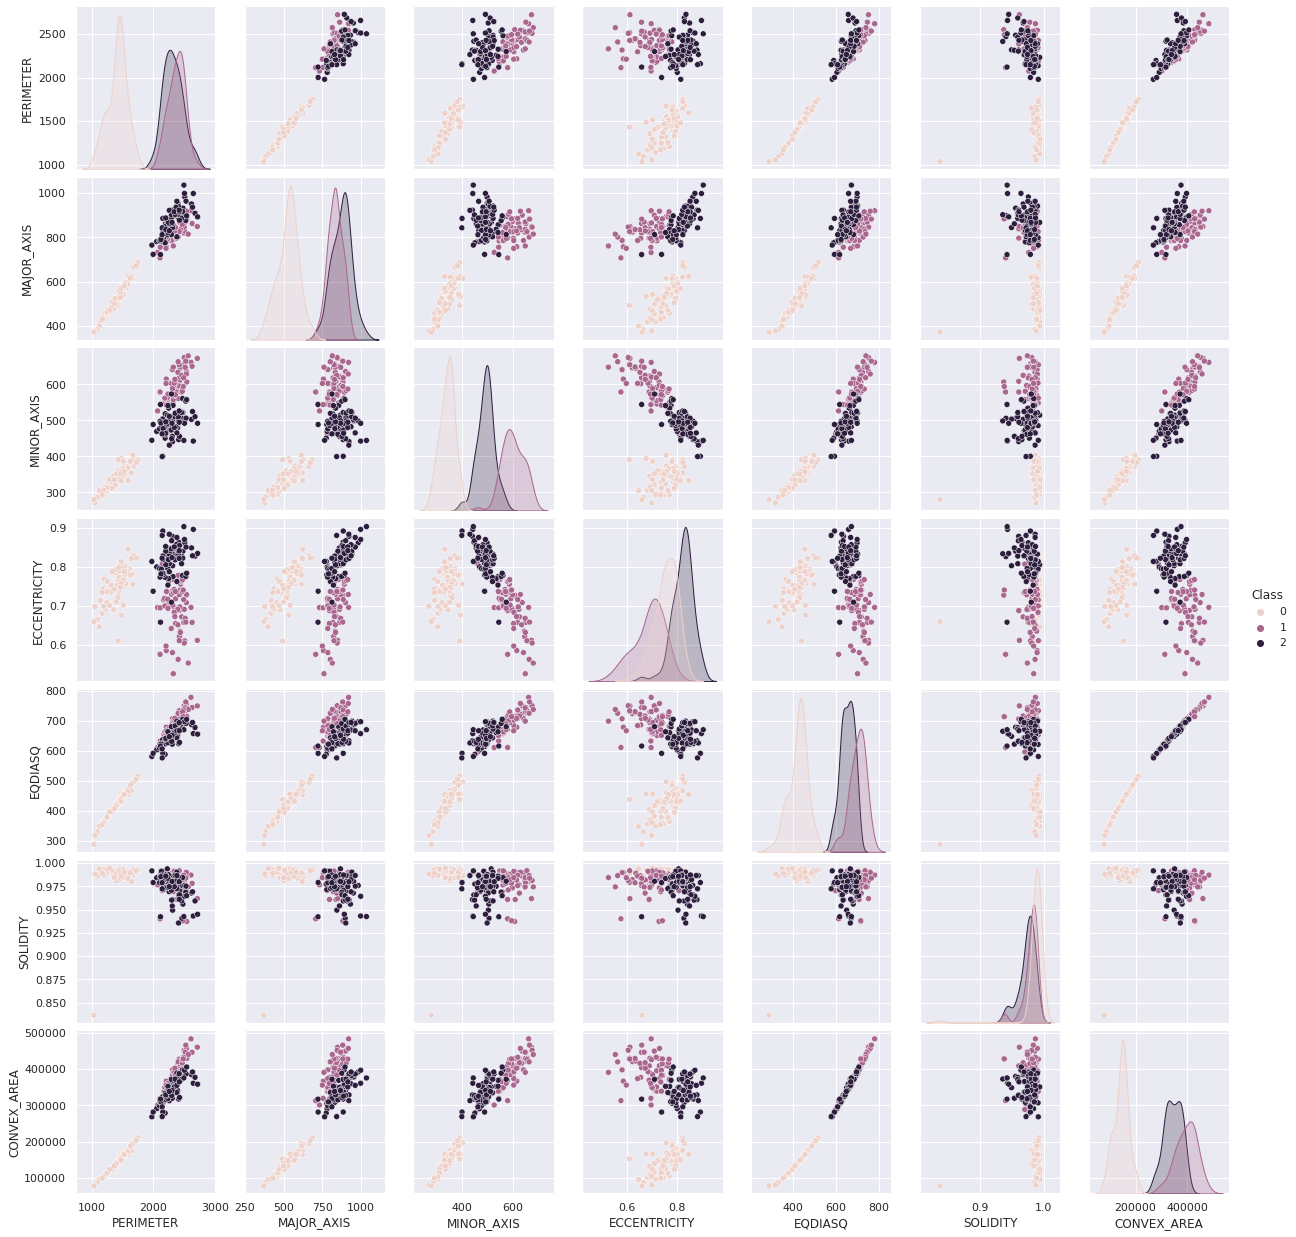

In [19]:
sns.pairplot(df, hue='Class')
plt.show()

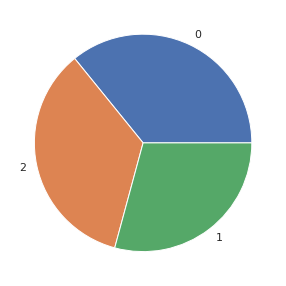

In [20]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [21]:
X = df.drop(columns=['Class'])
X.head(10)

PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  1427.5811    515.6693    354.6234        0.7260  427.2253    0.9865   
1  1671.4170    615.8516    403.3667        0.7557  497.3849    0.9870   
2  1503.5980    546.4366    361.8018        0.7494  443.1601    0.9883   
3  1463.5551    544.9724    361.5594        0.7482  443.4745    0.9944   
4  1403.3560    542.0650    326.1642        0.7987  419.5720    0.9935   
5  1467.7220    573.7374    333.2054        0.8141  436.7935    0.9918   
6  1569.0680    587.9650    367.5672        0.7805  464.0740    0.9923   
7  1530.7870    564.7152    362.0923        0.7674  451.0723    0.9920   
8  1487.1000    534.5702    393.8198        0.6762  457.7480    0.9923   
9  1426.8580    535.9053    345.1051        0.7651  429.6369    0.9922   

   CONVEX_AREA  
0       145320  
1       196863  
2       156070  
3       155339  
4       139162  
5       151080  
6       170461  
7       161095  
8       165851  
9       146121

In [22]:
X.describe().transpose()

count           mean            std         min            25%  \
PERIMETER     226.0    2014.929916     471.784851   1039.9240    1490.169425   
MAJOR_AXIS    226.0     738.401882     169.105237    372.3486     561.871275   
MINOR_AXIS    226.0     469.617240     110.372510    270.6614     358.065075   
ECCENTRICITY  226.0       0.758741       0.072622      0.5259       0.710825   
EQDIASQ       226.0     584.559966     127.802238    288.9840     443.852850   
SOLIDITY      226.0       0.980496       0.015470      0.8366       0.976450   
CONVEX_AREA   226.0  287273.765487  114382.176842  78398.0000  156443.000000   

                       50%            75%          max  
PERIMETER       2218.76550    2404.347500    2722.6831  
MAJOR_AXIS       805.67950     876.810050    1036.5886  
MINOR_AXIS       487.85380     560.343200     679.2316  
ECCENTRICITY       0.76635       0.814075       0.9035  
EQDIASQ          639.16520     686.997175     779.2183  
SOLIDITY           0.98455       0.989450       0.9947  
CONVEX_AREA   328771.00000  379292.000000  483065.0000

**Standardize the Data**

In [23]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  -1.247714   -1.320048   -1.044183     -0.451842 -1.233812  0.388936   
1  -0.729730   -0.726307   -0.601577     -0.041969 -0.683623  0.421328   
2  -1.086230   -1.137702   -0.979001     -0.128912 -1.108852  0.505548   
3  -1.171294   -1.146380   -0.981202     -0.145473 -1.106386  0.900733   
4  -1.299176   -1.163611   -1.302602      0.551450 -1.293829  0.842427   
5  -1.162442   -0.975901   -1.238666      0.763977 -1.158778  0.732293   
6  -0.947151   -0.891580   -0.926649      0.300282 -0.944846  0.764685   
7  -1.028472   -1.029372   -0.976363      0.119496 -1.046805  0.745250   
8  -1.121277   -1.208030   -0.688266     -1.139105 -0.994454  0.764685   
9  -1.249250   -1.200117   -1.130612      0.087755 -1.214900  0.758207   

   CONVEX_AREA  
0    -1.243803  
1    -0.792182  
2    -1.149611  
3    -1.156016  
4    -1.297759  
5    -1.193333  
6    -1.023517  
7    -1.105582  
8    -1.063910  
9    -1.236784

In [24]:
X.describe().transpose()

count          mean      std       min       25%       50%  \
PERIMETER     226.0  1.105311e-15  1.00222 -2.071220 -1.114757  0.433011   
MAJOR_AXIS    226.0 -9.225659e-16  1.00222 -2.169453 -1.046227  0.398728   
MINOR_AXIS    226.0  3.355232e-16  1.00222 -1.806586 -1.012931  0.165594   
ECCENTRICITY  226.0 -6.872575e-16  1.00222 -3.213311 -0.661264  0.105006   
EQDIASQ       226.0 -4.892841e-16  1.00222 -2.317894 -1.103419  0.428212   
SOLIDITY      226.0  3.036411e-15  1.00222 -9.322247 -0.262148  0.262606   
CONVEX_AREA   226.0 -2.859070e-16  1.00222 -1.830175 -1.146343  0.363600   

                   75%       max  
PERIMETER     0.827246  1.503491  
MAJOR_AXIS    0.820290  1.767235  
MINOR_AXIS    0.823822  1.903369  
ECCENTRICITY  0.763632  1.997736  
EQDIASQ       0.803308  1.526502  
SOLIDITY      0.580050  0.920168  
CONVEX_AREA   0.806266  1.715528

**Observations and variables**

In [25]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

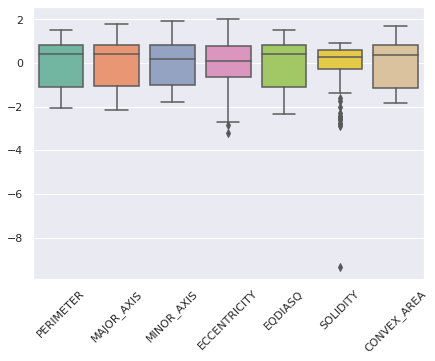

In [26]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

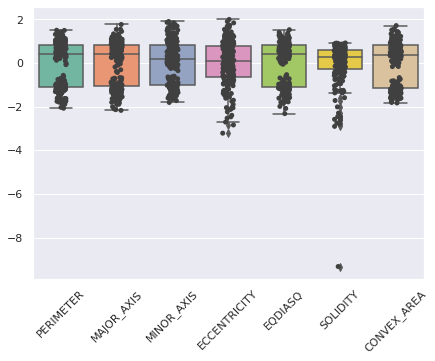

In [27]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

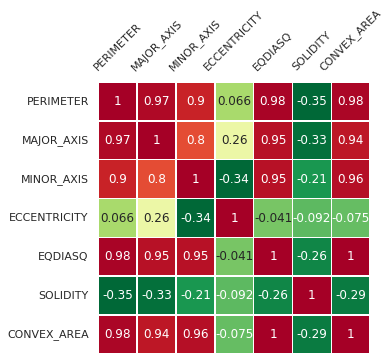

In [28]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

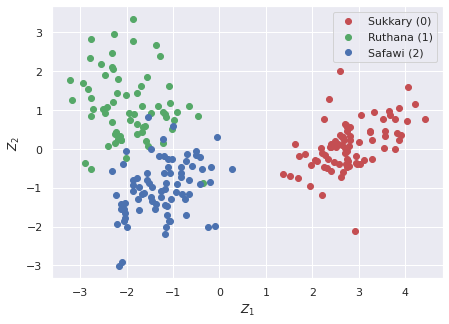

In [29]:
pca = PCA()
Z = pca.fit_transform(X)

# DOKOL->0,  ROTANA->1, SAFAVI->2
idx_Sukkary = np.where(y == 0)
idx_Ruthana = np.where(y == 1)
idx_Safawi = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Sukkary,0], Z[idx_Sukkary,1], c='r', label='Sukkary (0)')
plt.scatter(Z[idx_Ruthana,0], Z[idx_Ruthana,1], c='g', label='Ruthana (1)')
plt.scatter(Z[idx_Safawi,0], Z[idx_Safawi,1], c='b', label='Safawi (2)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

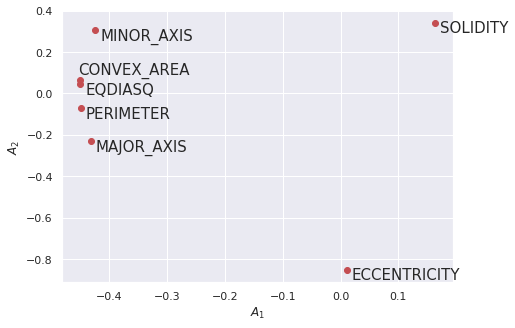

In [30]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    if label == 'CONVEX_AREA':
        plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='left', va='bottom', size=15)
        continue
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='left', va='top', size=15)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


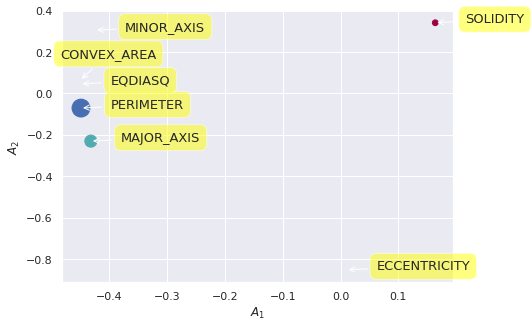

In [31]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    if label == 'CONVEX_AREA':
        plt.annotate(label,xy=(x, y), xytext=(-20, 20),
                     textcoords='offset points', ha='left', va='bottom', size=13,
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                     arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        continue
    plt.annotate(label,xy=(x, y), xytext=(30, 10),
      textcoords='offset points', ha='left', va='top', size=13,
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

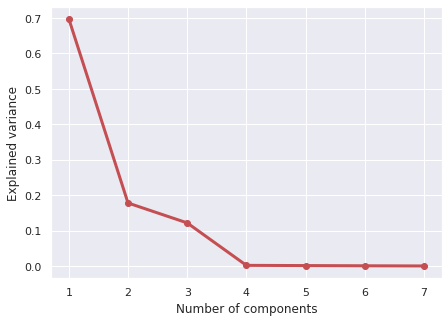

In [32]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

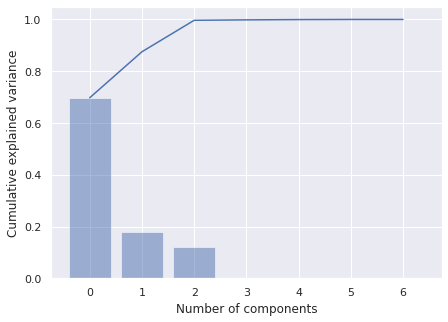

In [33]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

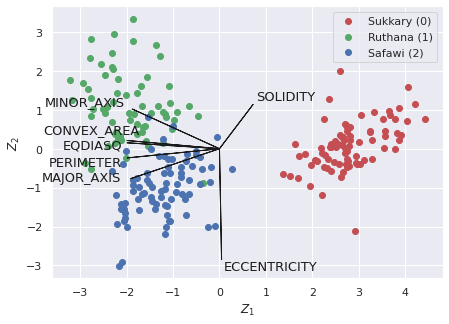

In [34]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
    # arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
    if variables[i] == 'CONVEX_AREA':
        plt.text(A1[i]*max(Z1)*1.9, A2[i]*max(Z2)*1.9, variables[i], color='k', size=13)
        continue
    elif variables[i] == 'EQDIASQ':
        plt.text(A1[i]*max(Z1)*1.7, A2[i]*max(Z2)*0., variables[i], color='k', size=13)
        continue
    elif variables[i] == 'PERIMETER':
        plt.text(A1[i]*max(Z1)*1.85, A2[i]*max(Z2)*1.9, variables[i], color='k', size=13)
        continue
    elif variables[i] == 'SOLIDITY':
        plt.text(A1[i]*max(Z1)*1.1, A2[i]*max(Z2)*1.1, variables[i], color='k', size=13)
        continue
            
    plt.text(A1[i]*max(Z1)*2., A2[i]*max(Z2)*1.1, variables[i], color='k', size=13)

plt.scatter(Z[idx_Sukkary,0], Z[idx_Sukkary,1], c='r', label='Sukkary (0)')
plt.scatter(Z[idx_Ruthana,0], Z[idx_Ruthana,1], c='g', label='Ruthana (1)')
plt.scatter(Z[idx_Safawi,0], Z[idx_Safawi,1], c='b', label='Safawi (2)')
plt.legend(loc='upper right')

##**Using PCA Library**

In [35]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=f707e26a3358cbf1646a5fef09bd55c19d33fb10d9c4240c1811baebbaee1d94
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [36]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [37]:
out['PC']

PC1       PC2       PC3
0    2.747209  0.457003  0.237383
1    1.629218  0.133860 -0.121593
2    2.492142  0.199641 -0.030516
3    2.601344  0.355636 -0.383893
4    2.948341 -0.360712 -0.527666
..        ...       ...       ...
221 -1.116769 -0.464467  0.032961
222 -0.410452 -0.908684 -0.305058
223 -1.737356 -1.564494  0.470328
224 -1.861684 -0.816859 -0.599223
225 -2.230465 -1.186938 -0.022455

[226 rows x 3 columns]

**Scatter plot**

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe04d652bd0>)

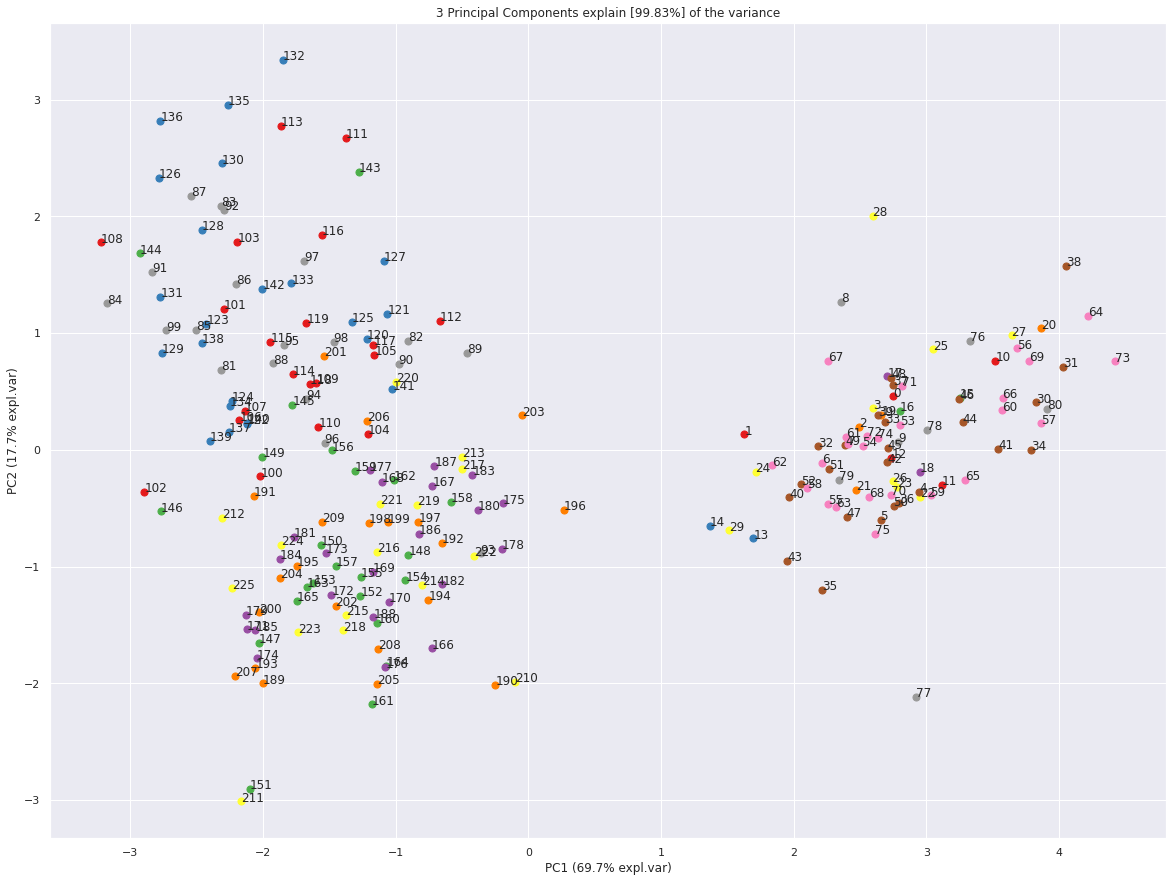

In [38]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [39]:
A = out['loadings'].T

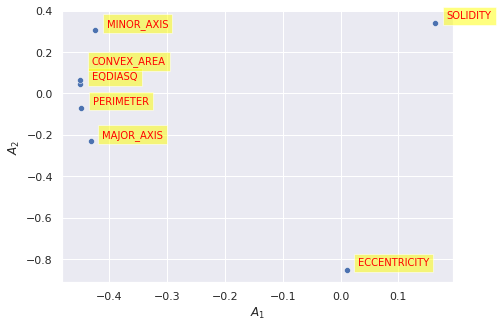

In [40]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
    if variables[i] == 'CONVEX_AREA':
        plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.08, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
        continue
    plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

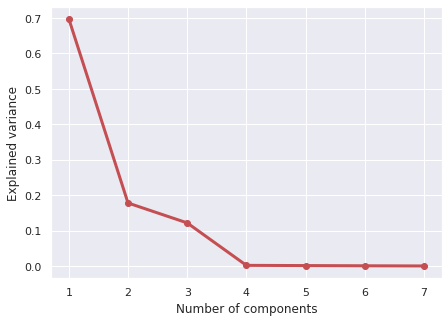

In [41]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

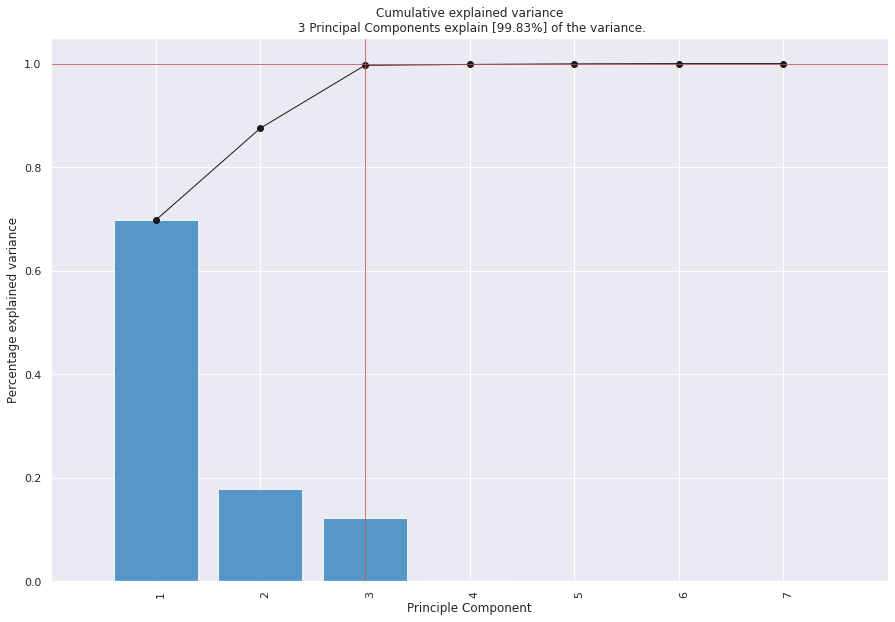

<Figure size 504x360 with 0 Axes>

In [42]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


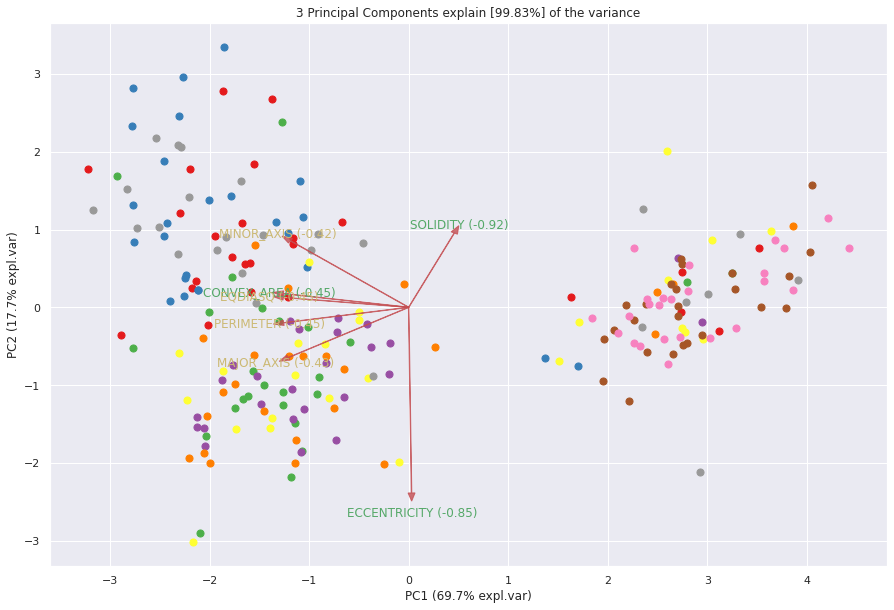

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe04c38b250>)

In [43]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


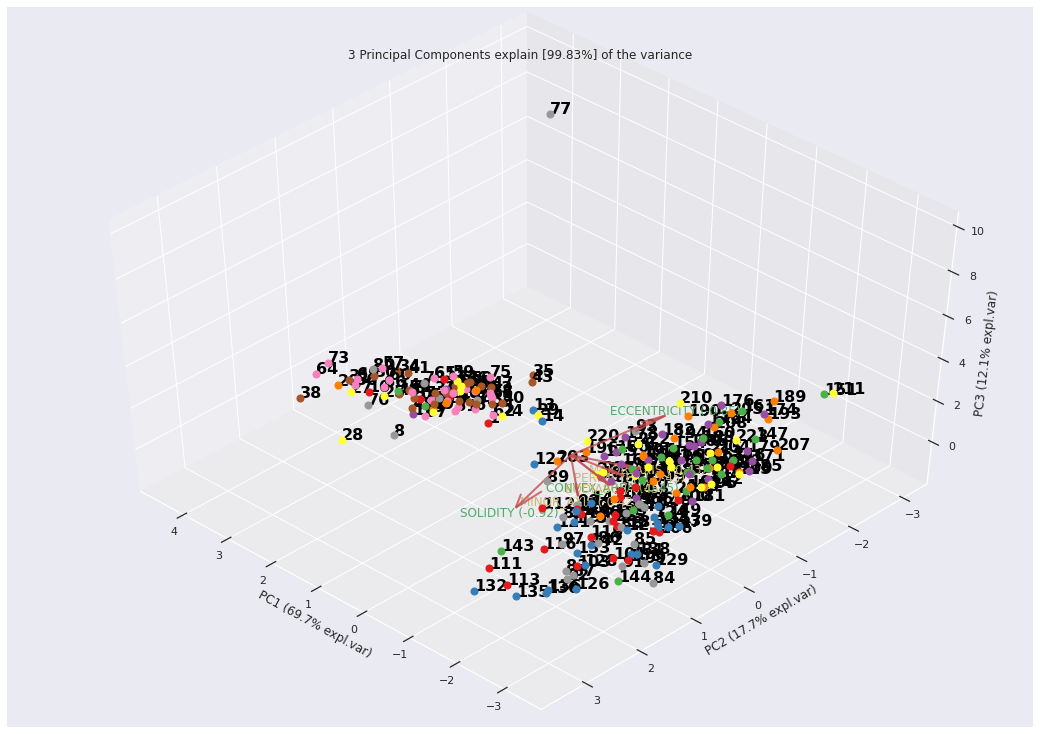

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fe04c6ab7d0>)

In [44]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

In [45]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [46]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [47]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (203, 8)
Unseen Data For Predictions: (23, 8)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [48]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (203, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (142, 6)
12                    Transformed Test Set           (61, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              f392
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [49]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    0.9786  0.0000  0.9783  0.9833   
nb                            Naive Bayes    0.9719  0.9971  0.9689  0.9776   
lda          Linear Discriminant Analysis    0.9714  1.0000  0.9656  0.9768   
rf               Random Forest Classifier    0.9648  0.9953  0.9589  0.9715   
qda       Quadratic Discriminant Analysis    0.9643  0.9880  0.9650  0.9731   
gbc          Gradient Boosting Classifier    0.9576  0.9922  0.9522  0.9657   
knn                K Neighbors Classifier    0.9510  0.9920  0.9472  0.9611   
lightgbm  Light Gradient Boosting Machine    0.9505  0.9920  0.9439  0.9612   
lr                    Logistic Regression    0.9438  0.9929  0.9394  0.9561   
ada                  Ada Boost Classifier    0.9433  0.9849  0.9361  0.9549   
et                 Extra Trees Classifier    0.9433  0.9903  0.9372  0.9561   
dt               Decision Tree Classifier    0.9076  0.9311  0.9017  0.9349   
svm                   SVM - Linear Kernel    0.5986  0.0000  0.6144  0.5032   
dummy                    Dummy Classifier    0.4014  0.5000  0.3333  0.1621   

              F1   Kappa     MCC  TT (Sec)  
ridge     0.9786  0.9673  0.9694     0.023  
nb        0.9716  0.9570  0.9598     0.026  
lda       0.9708  0.9561  0.9589     0.025  
rf        0.9641  0.9460  0.9495     0.566  
qda       0.9647  0.9457  0.9497     0.024  
gbc       0.9570  0.9353  0.9395     0.405  
knn       0.9507  0.9253  0.9299     0.144  
lightgbm  0.9488  0.9242  0.9303     0.127  
lr        0.9423  0.9140  0.9207     1.139  
ada       0.9410  0.9129  0.9190     0.166  
et        0.9418  0.9134  0.9201     0.520  
dt        0.9025  0.8581  0.8734     0.026  
svm       0.5168  0.4081  0.4928     0.078  
dummy     0.2307  0.0000  0.0000     0.024

In [50]:
best_model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [51]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9333  0.9545  0.9333  0.9467  0.9333  0.8993  0.9054
2       0.8571  0.8889  0.8333  0.8980  0.8587  0.7760  0.7955
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9286  0.9545  0.9333  0.9464  0.9297  0.8906  0.8977
5       0.8571  0.9091  0.8667  0.9143  0.8571  0.7846  0.8095
6       0.9286  0.9375  0.9333  0.9388  0.9274  0.8880  0.8953
7       0.8571  0.8889  0.8333  0.8980  0.8452  0.7812  0.8074
8       0.9286  0.9444  0.9333  0.9405  0.9278  0.8923  0.8993
9       0.7857  0.8333  0.7500  0.8661  0.7462  0.6693  0.7241
Mean    0.9076  0.9311  0.9017  0.9349  0.9025  0.8581  0.8734
SD      0.0645  0.0494  0.0754  0.0408  0.0733  0.0994  0.0846

In [52]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [53]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9333  0.9745  0.9333  0.9467  0.9333  0.8993  0.9054
2       0.8571  0.8889  0.8333  0.8980  0.8587  0.7760  0.7955
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9286  0.9784  0.9333  0.9464  0.9297  0.8906  0.8977
5       0.9286  0.9784  0.9333  0.9464  0.9297  0.8906  0.8977
6       0.9286  0.9256  0.9333  0.9388  0.9274  0.8880  0.8953
7       0.9286  0.9623  0.9167  0.9405  0.9267  0.8915  0.8985
8       0.9286  0.9698  0.9333  0.9429  0.9286  0.8931  0.9000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9433  0.9678  0.9417  0.9560  0.9434  0.9129  0.9190
SD      0.0427  0.0338  0.0479  0.0319  0.0425  0.0664  0.0611

In [54]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [82]:
!pip install statsmodels --upgrade

How to analyze model performance using various plots

In [56]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [57]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.8667  0.9873  0.8500  0.8667  0.8667  0.7973  0.7973
2       0.9286  1.0000  0.8889  0.9405  0.9247  0.8871  0.8946
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9286  0.9401  0.9333  0.9464  0.9297  0.8906  0.8977
5       0.8571  1.0000  0.8667  0.9143  0.8571  0.7846  0.8095
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9286  0.9925  0.9333  0.9429  0.9286  0.8931  0.9000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9510  0.9920  0.9472  0.9611  0.9507  0.9253  0.9299
SD      0.0543  0.0178  0.0580  0.0443  0.0544  0.0823  0.0773

**Tune K Neighbors Model**

In [58]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9333  0.9936  0.9333  0.9467  0.9333  0.8993  0.9054
1       0.9333  0.9482  0.9333  0.9467  0.9333  0.8993  0.9054
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9286  0.9473  0.9333  0.9464  0.9297  0.8906  0.8977
5       0.8571  0.9545  0.8667  0.9143  0.8571  0.7846  0.8095
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9286  0.9849  0.9333  0.9429  0.9286  0.8931  0.9000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9581  0.9829  0.9600  0.9697  0.9582  0.9367  0.9418
SD      0.0468  0.0220  0.0442  0.0316  0.0468  0.0707  0.0639

**Evaluate K Neighbors Model**

In [59]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [60]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9333  0.9719  0.9444  0.9444  0.9333  0.8993  0.9054
1       0.9333  0.9933  0.9444  0.9444  0.9333  0.8993  0.9054
2       0.9286  1.0000  0.8889  0.9405  0.9247  0.8871  0.8946
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9286  0.9711  0.9333  0.9464  0.9297  0.8906  0.8977
5       0.9286  1.0000  0.9333  0.9464  0.9297  0.8906  0.8977
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8571  1.0000  0.8333  0.8980  0.8452  0.7812  0.8074
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9286  0.9929  0.9167  0.9405  0.9267  0.8915  0.8985
Mean    0.9438  0.9929  0.9394  0.9561  0.9423  0.9140  0.9207
SD      0.0426  0.0110  0.0505  0.0318  0.0452  0.0652  0.0587

**Tune Logistic Regression Model**

In [61]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9286  1.0000  0.8889  0.9405  0.9247  0.8871  0.8946
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9286  0.9711  0.9333  0.9464  0.9297  0.8906  0.8977
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9286  1.0000  0.9333  0.9405  0.9278  0.8923  0.8993
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9786  0.9971  0.9756  0.9827  0.9782  0.9670  0.9691
SD      0.0327  0.0087  0.0391  0.0264  0.0333  0.0504  0.0471

**Evaluate Logistic Regression Model**

In [62]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [63]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9333  0.9745  0.9333  0.9467  0.9333  0.8993  0.9054
2       0.9286  1.0000  0.8889  0.9405  0.9247  0.8871  0.8946
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9286  0.9784  0.9333  0.9464  0.9297  0.8906  0.8977
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9286  1.0000  0.9167  0.9405  0.9267  0.8915  0.8985
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9286  1.0000  0.9167  0.9405  0.9267  0.8915  0.8985
Mean    0.9648  0.9953  0.9589  0.9715  0.9641  0.9460  0.9495
SD      0.0353  0.0095  0.0427  0.0286  0.0359  0.0541  0.0506

**Tune Random Forest Model**

In [64]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9333  0.9873  0.9333  0.9467  0.9333  0.8993  0.9054
2       0.9286  1.0000  0.8889  0.9405  0.9247  0.8871  0.8946
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9286  0.9856  0.9333  0.9464  0.9297  0.8906  0.8977
5       0.9286  1.0000  0.9333  0.9464  0.9297  0.8906  0.8977
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9286  1.0000  0.9167  0.9405  0.9267  0.8915  0.8985
Mean    0.9648  0.9973  0.9606  0.9720  0.9644  0.9459  0.9494
SD      0.0353  0.0054  0.0413  0.0280  0.0356  0.0542  0.0507

**Evaluate Random Forest Model**

In [65]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [66]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9286  0.0  0.9333  0.9464  0.9297  0.8906  0.8977
5       0.9286  0.0  0.9333  0.9464  0.9297  0.8906  0.8977
6       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9286  0.0  0.9167  0.9405  0.9267  0.8915  0.8985
Mean    0.9786  0.0  0.9783  0.9833  0.9786  0.9673  0.9694
SD      0.0327  0.0  0.0334  0.0255  0.0327  0.0500  0.0468

In [67]:
tuned_best_model

RidgeClassifier(alpha=8.6, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [68]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [69]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (203, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (142, 3)
12                    Transformed Test Set           (61, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              8aee
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [70]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.9714  0.9956  0.9672  0.9774   
lr                    Logistic Regression    0.9648  0.9971  0.9589  0.9715   
dt               Decision Tree Classifier    0.9648  0.9753  0.9606  0.9720   
lda          Linear Discriminant Analysis    0.9648  0.9971  0.9589  0.9715   
nb                            Naive Bayes    0.9576  0.9871  0.9522  0.9643   
ada                  Ada Boost Classifier    0.9510  0.9904  0.9411  0.9598   
knn                K Neighbors Classifier    0.9505  0.9919  0.9444  0.9606   
svm                   SVM - Linear Kernel    0.9505  0.0000  0.9456  0.9663   
qda       Quadratic Discriminant Analysis    0.9433  0.9871  0.9344  0.9526   
et                 Extra Trees Classifier    0.9433  0.9948  0.9344  0.9526   
ridge                    Ridge Classifier    0.9429  0.0000  0.9311  0.9553   
gbc          Gradient Boosting Classifier    0.9362  0.9933  0.9233  0.9527   
lightgbm  Light Gradient Boosting Machine    0.9362  0.9924  0.9217  0.9513   
dummy                    Dummy Classifier    0.4014  0.5000  0.3333  0.1621   

              F1   Kappa     MCC  TT (Sec)  
rf        0.9711  0.9560  0.9588     0.489  
lr        0.9641  0.9460  0.9495     0.028  
dt        0.9644  0.9459  0.9494     0.018  
lda       0.9641  0.9460  0.9495     0.019  
nb        0.9571  0.9353  0.9387     0.020  
ada       0.9486  0.9241  0.9290     0.117  
knn       0.9499  0.9241  0.9290     0.118  
svm       0.9488  0.9248  0.9326     0.063  
qda       0.9424  0.9133  0.9181     0.018  
et        0.9423  0.9133  0.9182     0.474  
ridge     0.9407  0.9120  0.9189     0.018  
gbc       0.9332  0.9015  0.9103     0.275  
lightgbm  0.9322  0.9013  0.9102     0.044  
dummy     0.2307  0.0000  0.0000     0.017

In [71]:
best_model_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Tune the Best Model**

In [72]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9286  0.9545  0.9333  0.9464  0.9297  0.8906  0.8977
5       0.7857  0.9928  0.8000  0.8929  0.7755  0.6818  0.7319
6       0.9286  0.9444  0.8889  0.9405  0.9247  0.8871  0.8946
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9286  0.9369  0.9167  0.9405  0.9267  0.8915  0.8985
Mean    0.9571  0.9829  0.9539  0.9720  0.9557  0.9351  0.9423
SD      0.0655  0.0250  0.0652  0.0369  0.0684  0.0978  0.0839

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [73]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [74]:
!pip install shap

     |████████████████████████████████| 564 kB 4.8 MB/s 


In [75]:
import shap

In [76]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9286  0.9632  0.9333  0.9464  0.9297  0.8906  0.8977
5       0.9286  1.0000  0.9333  0.9464  0.9297  0.8906  0.8977
6       0.9286  1.0000  0.8889  0.9405  0.9247  0.8871  0.8946
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9286  0.9929  0.9167  0.9405  0.9267  0.8915  0.8985
Mean    0.9714  0.9956  0.9672  0.9774  0.9711  0.9560  0.9588
SD      0.0350  0.0110  0.0418  0.0278  0.0354  0.0539  0.0504

In [77]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9286  0.9545  0.9333  0.9464  0.9297  0.8906  0.8977
5       0.7857  0.9928  0.8000  0.8929  0.7755  0.6818  0.7319
6       0.9286  0.9444  0.8889  0.9405  0.9247  0.8871  0.8946
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9286  0.9369  0.9167  0.9405  0.9267  0.8915  0.8985
Mean    0.9571  0.9829  0.9539  0.9720  0.9557  0.9351  0.9423
SD      0.0655  0.0250  0.0652  0.0369  0.0684  0.0978  0.0839

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

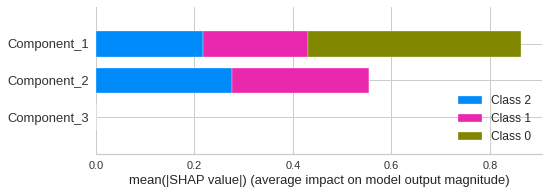

In [78]:
interpret_model(tuned_rf_pca, plot='summary')

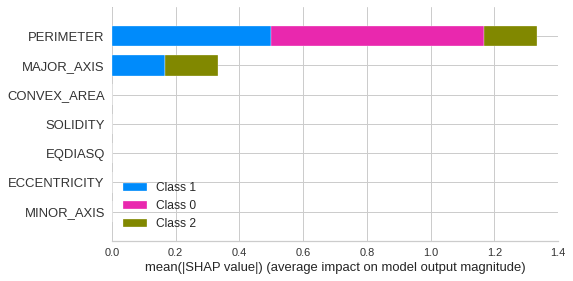

In [79]:
explainer = shap.TreeExplainer(tuned_rf_pca)
X = df.drop('Class', axis=1)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [80]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [81]:
interpret_model(tuned_rf_pca, plot='reason')